# Capstone Project: Comment Subtopics Analysis for Airbnb Hosts
---

How can a host on Airbnb understand that are their strengths and weaknesses? How can hosts point out the demand trend of their customers from a large scale of comments? This project focuses on using machine learning tools to help hosts understand the underlying trends of the comments on their property.  

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Capstone-Project:-Comment-Subtopics-Analysis-for-Airbnb-Hosts" data-toc-modified-id="Capstone-Project:-Comment-Subtopics-Analysis-for-Airbnb-Hosts-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Capstone Project: Comment Subtopics Analysis for Airbnb Hosts</a></span></li><li><span><a href="#Part-5:-Use-Comments-to-Predict-Star-Ratings-For-Each-Host" data-toc-modified-id="Part-5:-Use-Comments-to-Predict-Star-Ratings-For-Each-Host-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 5: Use Comments to Predict Star Ratings For Each Host</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Steps" data-toc-modified-id="Steps-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Steps</a></span></li></ul></li><li><span><a href="#Creating-individual-Corpus-For-Each-Listings" data-toc-modified-id="Creating-individual-Corpus-For-Each-Listings-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Creating individual Corpus For Each Listings</a></span></li><li><span><a href="#Cleaning-Comments" data-toc-modified-id="Cleaning-Comments-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cleaning Comments</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Train Test Split</a></span><ul class="toc-item"><li><span><a href="#with-CountVectorizer" data-toc-modified-id="with-CountVectorizer-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>with CountVectorizer</a></span></li><li><span><a href="#with-TFIDF" data-toc-modified-id="with-TFIDF-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>with TFIDF</a></span></li><li><span><a href="#with-word2vec" data-toc-modified-id="with-word2vec-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>with word2vec</a></span></li></ul></li><li><span><a href="#Power-Transformer" data-toc-modified-id="Power-Transformer-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Power Transformer</a></span></li><li><span><a href="#Building-Baseline-Model" data-toc-modified-id="Building-Baseline-Model-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Building Baseline Model</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Grandient-Boosting-Regressor" data-toc-modified-id="Grandient-Boosting-Regressor-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Grandient Boosting Regressor</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Use-Neural-Network-to-Predict-Rating" data-toc-modified-id="Use-Neural-Network-to-Predict-Rating-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Use Neural Network to Predict Rating</a></span><ul class="toc-item"><li><span><a href="#Scailing-the-Data" data-toc-modified-id="Scailing-the-Data-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Scailing the Data</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Model</a></span></li></ul></li></ul></div>


# Part 5: Use Comments to Predict Star Ratings For Each Host

- After performing exploratory data analysis on the documents, we can see that here is some kind of realtionship between comments and review score.Now, with this finding, in this documentation, we are going to use comments in each listings to predict the rating for this listing. 
---

### Steps 
1. creating individual corpus for each listing 
2. build a baseline model for prediction 
3. improve on model

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn import svm

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

np.random.seed(42)

In [2]:
reviews = pd.read_csv('../data/reviews_sentiment_score.csv', index_col = 0)

In [3]:
reviews.head()

,key_0,listing_id,id,date,reviewer_id,reviewer_name,comments,language,overall_rating,compound,neg,neu,pos
0,0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st...",en,97.0,0.9590,0.000,0.788,0.212
1,1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,en,97.0,0.9819,0.000,0.697,0.303
2,2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...,en,97.0,0.7600,0.134,0.710,0.156
3,3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...,en,97.0,0.9840,0.035,0.646,0.319
4,4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...,en,97.0,0.9617,0.000,0.613,0.387


In [135]:
listing = pd.read_csv('../data/listings/2019-03-06_data_listings.csv')

In [136]:
reviews.dtypes

key_0               int64
listing_id          int64
id                  int64
date               object
reviewer_id         int64
reviewer_name      object
comments           object
language           object
overall_rating    float64
compound          float64
neg               float64
neu               float64
pos               float64
dtype: object

## Creating individual Corpus For Each Listings 

---

In [137]:
review_dict = {}
for i in reviews['listing_id'].unique(): 
    comment_list = list(reviews[reviews['listing_id'] == i]['comments'])
    one_list = "".join(comment_list)
    review_dict[i] = one_list

In [138]:
len(review_dict)

4199

In [139]:
len(reviews['listing_id'].unique())

4199

In [140]:
review_prediction_df = pd.DataFrame(data = [review_dict.keys()])

In [141]:
review_prediction_df = review_prediction_df.T

In [142]:
review_prediction_df.columns = ['listing_id']

In [143]:
review_prediction_df['comment'] = review_prediction_df['listing_id'].map(review_dict)

In [144]:
review_prediction_df['overall_score'] = listing['review_scores_rating']

In [145]:
#complete Review Prediction Data Frame 
review_prediction_df.head()

,listing_id,comment,overall_score
0,958,"Our experience was, without a doubt, a five st...",97.0
1,5858,We had a fabulous time staying with Philip and...,98.0
2,7918,My stay was fantastic! The neighborhood is gr...,85.0
3,8142,"Excellent! The space is clean and quiet, and t...",93.0
4,8339,My stay was wonderful in many ways; the apartm...,97.0


In [146]:
review_prediction_df.describe()

,listing_id,overall_score
count,4.199000e+03,4008.000000
mean,9.700544e+06,95.506487
std,7.126105e+06,6.109349
min,9.580000e+02,20.000000
25%,2.700651e+06,94.000000
50%,8.817059e+06,97.000000
75%,1.616297e+07,99.000000
max,2.181282e+07,100.000000


## Cleaning Comments

---

In [147]:
def clean_text(text): 
    '''
    This clean_text function will focus on: 
    1. cleaning the content including removing prentecisis, \r\n, : and so on. 
    2. lower case all words.
    3. remove stop words from articles. 
    '''
    text = re.sub(r'\r\n', r' ', text)
    text = re.sub(r'[\\\.\:\*/\,\!]', r' ', text)
    text = re.sub(r'[\(\)]', r' ', text)
    text = re.sub(r'[\"\“\”\—\[\]]', r' ', text)
    text = re.sub(r"'s", r' ', text)
    text = re.sub(r'[\\"]', r' ', text)
    text = text.lower()
    
    return text

In [148]:
clean_comment = []
for comment in review_prediction_df['comment']: 
    new_comment = clean_text(comment)
    clean_comment.append(new_comment)

In [149]:
review_prediction_df['comment'] = clean_comment

In [150]:
review_prediction_df.head()

,listing_id,comment,overall_score
0,958,our experience was without a doubt a five st...,97.0
1,5858,we had a fabulous time staying with philip and...,98.0
2,7918,my stay was fantastic the neighborhood is gr...,85.0
3,8142,excellent the space is clean and quiet and t...,93.0
4,8339,my stay was wonderful in many ways; the apartm...,97.0


In [314]:
#number of words 
length = review_prediction_df['comment'].map(lambda x: len(x))

In [317]:
length.describe()

count      4008.000000
mean      19678.842315
std       25119.676195
min          12.000000
25%        2781.000000
50%       10153.000000
75%       26420.000000
max      210701.000000
Name: comment, dtype: float64

In [151]:
review_prediction_df.shape 

(4199, 3)

In [128]:
review_prediction_df.to_csv('../data/clean_comments.csv')

## Train Test Split 
___

In [152]:
#extract samples from the population to perform regression models 
sample_df = review_prediction_df.sample(500)

In [153]:
X = sample_df['comment']
y = sample_df['overall_score'].fillna(0)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

### with CountVectorizer 

In [155]:
#building baseine model 
cv = CountVectorizer(ngram_range= (1,1), 
                     stop_words= 'english', 
                     min_df = 2,
                     max_features = 20000)
X_train_cv = cv.fit_transform(X_train)

In [156]:
X_test_cv = cv.transform(X_test)

In [157]:
X_train_cv.shape, X_test_cv.shape

((375, 7807), (125, 7807))

### with TFIDF 

In [158]:
tfidf = TfidfVectorizer(max_features = 20000, 
                        stop_words = 'english', 
                        ngram_range = (1,1))
X_train_tfidf = tfidf.fit_transform(X_train)

In [159]:
X_test_tfidf = tfidf.transform(X_test)

In [160]:
X_train_tfidf.shape, X_test_tfidf.shape

((375, 16088), (125, 16088))

### with word2vec
---

In [116]:
word2vec = Word2Vec.load('word2vec.model')
model.train(X_train, total_examples=1, epochs=1)

(1076470, 6712653)

In [118]:
X_train.shape

(375,)

## Power Transformer 
---

In [94]:
#for cvec 
pt = PowerTransformer()
X_train_cvec_pt = pt.fit_transform(X_train_cv.toarray())
X_test_cvec_pt = pt.transform(X_test_cv.toarray())

In [89]:
#for cvec 
pt = PowerTransformer()
X_train_tfidf_pt = pt.fit_transform(X_train_tfidf.toarray())
X_test_tfidf_pt = pt.transform(X_test_tfidf.toarray())

## Building Baseline Model 
---

### Linear Regression

In [95]:
#with countvectorizer 
lr = LinearRegression()
lr.fit(X_train_cvec_pt, y_train)

print(lr.score(X_train_cvec_pt, y_train))
lr.score(X_test_cvec_pt, y_test)

1.0


-0.486421017725454

In [110]:
#with tfidf
lr = LinearRegression()
lr.fit(X_train_tfidf_pt, y_train)
print(lr.score(X_train_tfidf_pt, y_train))
lr.score(X_test_tfidf_pt, y_test)

1.0


-0.11663358671044222

### Grandient Boosting Regressor 

In [109]:
ada = AdaBoostRegressor()
ada.fit(X_train_cvec_pt, y_train)
print(ada.score(X_train_cvec_pt, y_train))
print(ada.score(X_test_cvec_pt, y_test))

0.37419612902329225
-0.12607426638921582


In [111]:
ada = AdaBoostRegressor()
ada.fit(X_train_tfidf_pt, y_train)
print(ada.score(X_train_tfidf_pt, y_train))
print(ada.score(X_test_tfidf_pt, y_test))

0.4334897911074721
-0.08059940048192349


### Random Forest 

In [103]:
rf = RandomForestRegressor()
rf.fit(X_train_cvec_pt, y_train)

print(rf.score(X_train_cvec_pt, y_train))
print(rf.score(X_test_cvec_pt, y_test))

/Users/evelyn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8119393640434089
-0.37849665098430085


In [104]:
rf = RandomForestRegressor()
rf.fit(X_train_cvec_pt, y_train)

print(rf.score(X_train_cvec_pt, y_train))
print(rf.score(X_test_cvec_pt, y_test))

/Users/evelyn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7964723887581897
-0.3329663705459267


## Use Neural Network to Predict Rating 
---


In [161]:
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras import optimizers
from keras.callbacks import EarlyStopping

from nltk.corpus import stopwords

In [162]:
review_prediction_df.isnull().sum()

listing_id         0
comment            0
overall_score    191
dtype: int64

In [163]:
#drop NA 
review_prediction_df.dropna(inplace= True)

In [164]:
review_prediction_df.isnull().sum()

listing_id       0
comment          0
overall_score    0
dtype: int64

In [165]:
review_prediction_df.head()

,listing_id,comment,overall_score
0,958,our experience was without a doubt a five st...,97.0
1,5858,we had a fabulous time staying with philip and...,98.0
2,7918,my stay was fantastic the neighborhood is gr...,85.0
3,8142,excellent the space is clean and quiet and t...,93.0
4,8339,my stay was wonderful in many ways; the apartm...,97.0


In [166]:
review_prediction_df.shape

(4008, 3)

In [468]:
#tokenizing the data 
vocabulary_size = 50000
max_sequence= 5000 
embedding_dim = 500
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(review_prediction_df['comment'].values)

In [469]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 65973 unique tokens.


In [470]:
len(review_prediction_df['comment'].values)

4008

In [471]:
X = tokenizer.texts_to_sequences(review_prediction_df['comment'].values)
X = pad_sequences(X, maxlen = max_sequence)

In [472]:
print('Shape of data tensor:', X.shape)

Shape of data tensor: (4008, 5000)


In [473]:
y = review_prediction_df['overall_score']
print('Shape of target:', y.shape)

Shape of target: (4008,)


In [474]:
#Train_test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3206, 5000) (3206,)
(802, 5000) (802,)


### Scailing the Data 
---

In [475]:
pt = PowerTransformer()
X_train_pt = pt.fit_transform(X_train)
X_test_pt = pt.transform(X_test)

In [476]:
X_train_pt.shape

(3206, 5000)

## Model 
---

In [478]:
#building model

model = Sequential()

model.add(Dense(1200, activation = 'relu', input_shape = (5000,)))

model.add(Dense(600, activation = 'relu'))

model.add(Dense(300, activation = 'relu'))

model.add(Dense(120, activation = 'relu'))

model.add(Dense(64, activation = 'relu'))

model.add(Dense(32, activation = 'relu' ))

model.add(Dense(12, activation = 'relu' ))

#output layer 
model.add(Dense(1))

#adjust learning rate
# adadelta = optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam = optimizers.Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0001, amsgrad=False)
# RMSprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(optimizer= adam, loss='mean_absolute_error', metrics=['mean_absolute_error'])

epochs = 20
batch_size = 86

history = model.fit(X_train_pt, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 2885 samples, validate on 321 samples
Epoch 1/20
2885/2885 [==============================] - 14s 5ms/step - loss: 22.7502 - mean_absolute_error: 22.7502 - val_loss: 12.9369 - val_mean_absolute_error: 12.9369
Epoch 2/20
2885/2885 [==============================] - 6s 2ms/step - loss: 6.0837 - mean_absolute_error: 6.0837 - val_loss: 5.3620 - val_mean_absolute_error: 5.3620
Epoch 3/20
2885/2885 [==============================] - 7s 2ms/step - loss: 6.5985 - mean_absolute_error: 6.5985 - val_loss: 5.8625 - val_mean_absolute_error: 5.8625
Epoch 4/20
2885/2885 [==============================] - 7s 2ms/step - loss: 5.6281 - mean_absolute_error: 5.6281 - val_loss: 7.2848 - val_mean_absolute_error: 7.2848
Epoch 5/20
2885/2885 [==============================] - 7s 2ms/step - loss: 5.7158 - mean_absolute_error: 5.7158 - val_loss: 4.6871 - val_mean_absolute_error: 4.6871
Epoch 6/20
2885/2885 [==============================] - 7s 2ms/step - loss: 4.5224 - mean_absolute_error: 4.5224 - val

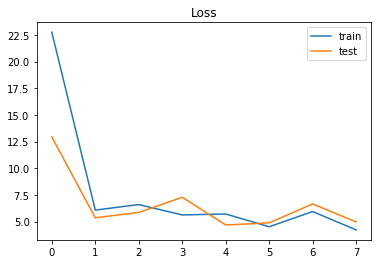

In [479]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

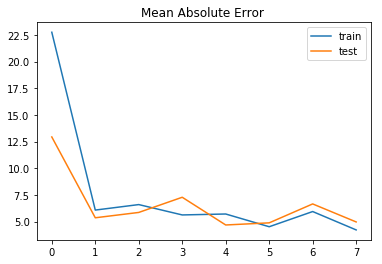

In [480]:
plt.title('Mean Absolute Error ')
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='test')
plt.legend()
plt.show();

In [487]:
X_test_pt.shape

(802, 5000)

In [488]:
prediction = model.predict(X_test_pt)

In [489]:
#building prediction DataFrame
prediction_df = pd.DataFrame(data = prediction, columns= ['prediction'])

prediction_df['y_test'] = y_test.values

prediction_df['difference'] = prediction_df['prediction'] - prediction_df['y_test']

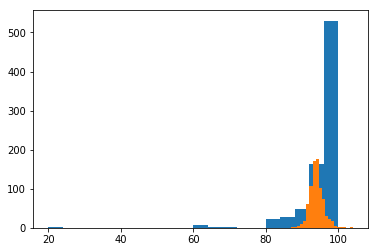

In [490]:
plt.hist(prediction_df['y_test'], bins = 20)
plt.hist(prediction_df['prediction'], bins = 20); 

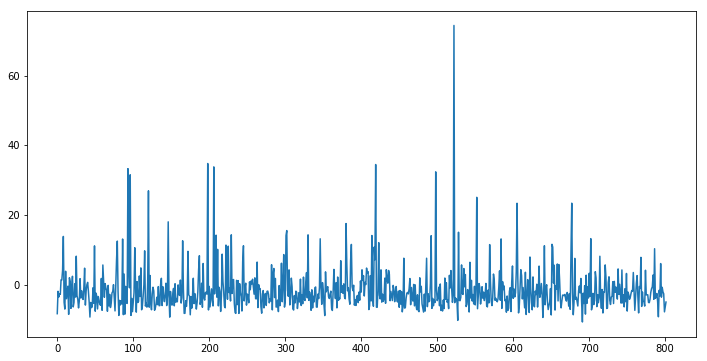

In [491]:
plt.figure(figsize = (12,6))
plt.plot(prediction_df['difference'])

In [492]:
metrics.r2_score(prediction_df['y_test'], prediction_df['prediction'])

-0.14247648118434442